# kNN: k Nearest Neighbor

The principle behind the *nearest neighbor classifier* consists in finding a predefined number $k$ of training samples closest in distance to a new sample, which has to be classified. The label of the new sample will be defined from these neighbors. kNN has a fixed, user defined, constant for the number of neighbors which have to be determined.

The distance can, in general, be any metric measure: standard euclidean distance is the most common choice.

The k-NN algorithm is among the simplest of all machine learning algorithms, but despite its simplicity, it has been quite successful in a large number of classification and regression problems, for example, character recognition or image analysis.

There is no general way to determine the best value for $k$, but a common approach is to choose $k$ as an odd number if the number of classes is even.

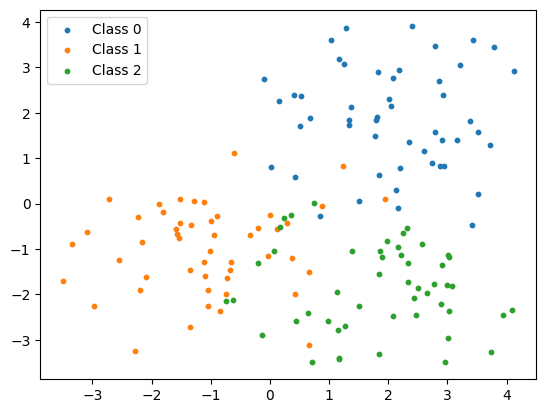

In [4]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

n_samples = 150
centers = [[2, 2], [-1, -1], [2, -2]]
n_classes = len(centers)
seed = 69

data, labels = make_blobs(n_samples=n_samples, centers=centers,random_state=seed)


for n_class in range(n_classes):
    plt.scatter(data[labels == n_class, 0], data[labels == n_class, 1], label=f"Class {n_class}", s = 10)
    
plt.legend()

## Create and fit a nearest-neighbors classifier

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2, random_state=seed)


knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(train_data, train_labels)

predictions = knn.predict(test_data)
print(f"predictions: {predictions}")
print(f"true labels: {test_labels}")


predictions: [0 2 1 0 2 0 1 1 2 0 1 2 1 0 1 2 0 0 2 2 2 2 1 0 2 0 0 0 2 2]
true labels: [0 2 1 0 2 0 1 1 1 0 2 2 1 0 1 1 0 0 2 2 1 1 0 0 2 0 0 0 2 2]


## Evaluate the result

In [7]:
from sklearn.metrics import classification_report
print(classification_report(predictions, test_labels))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        11
           1       0.56      0.71      0.62         7
           2       0.89      0.67      0.76        12

    accuracy                           0.80        30
   macro avg       0.79      0.79      0.78        30
weighted avg       0.82      0.80      0.80        30

